In [203]:
#!conda install --yes -c conda-forge cufflinks-py

# Introduction

## Overview

Bitcoin (BTC) is proposed to provided a modern era store of value and be a potential successor to Gold (GLD) in this respect (Ammous, 2018). Ammous (2018) illustrates that one of the key determinate factors of both BTC and GLD in confering this property is that they both demonstrate a high stock-to-flow ratio.

Stock-to-flow refers to the property by which the current global stock or holding of an asset compares to the potential incomming flow of that asset. For example, the global stock of GLD compared to the potential new production of GLD is very high - i.e. its a rare metal on Earth and the effort of extraction of new GLD only accounts for some 2% of the stock. This is compared to the potential stock-to-flow of fiat currency whereby government issued paper (no longer backed by anything like a gold standard) can be printed / minted readily (with little effort) thus large quantities of new flow can devalue currently held stock, leading to inflationary periods and the consequent socio-economic results. The economic model of BTC is purported to resemble that of GLD as BTC miners are effectively expending a larger amount of resource and effort in minting new Bitcions. In addition the total global supply of BTC is capped to 22 million; this should result in a deflationary currency.

This study will make heavy use of the methods of Hilpisch (2020), who writes as a specialist in the domain of data-driven finance. So as such it is both a learning excercise of personal interest in the crypto currency markets though also a vehicle by which the author can learn and test the methods of Hilpisch.

## Problem Statements

In this study this notebook will:

1. Investigate the potential correlation between BTC and GLD returns in timeseries, assuming a positive correlation indicates some representation whereby BTC is also considered a store of value. The assumption here is that when investors opt for gold as a store of value they could also opt for BTC.
2. Machine learning will be applied to determine if the trades into BTC or GLD can be recommended over just holding a long position (it is suspected that the recent activities driving the price of BTC higher could result in an extremely simple, hold only strategy)


## Metrics

The metrics for this project are relatively simple, given the strong connection to the financial domain and are either the price of the assets (GLD, BTC), the returns or relevant statistical metrics such as correlation.

## Data

Data for crypto currency prices where obtained for free from https://www.cryptodatadownload.com and data is from the crypto currency exchange Binance.

Data for gold prices was obtained from Yahoo Finance https://uk.finance.yahoo.com.


In [728]:
# import libraries
import os
import pandas as pd
import numpy as np
import time

import cufflinks as cf
import plotly.offline as plyo
#pd.options.plotting.backend = "plotly"
cf.go_offline()

from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline

The project does not require a full Extract Transform Load (ETL) pipeline, we do however need to extract and potentially clean the data after a period of discovery. The extraction and initial analysis of daily BTC (from the exchange Binance (2021) follows).

In [627]:

df_BTC_USD_daily = pd.read_csv('crypto_data/Binance_BTCUSDT_d.csv', skiprows=1)

In [628]:
df_BTC_USD_daily.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.611187e+12,2021-01-21 00:00:00,BTC/USDT,35468.23,35600.00,35304.63,35319.06,307.752511,1.091121e+07,10161.0
1,1.611101e+12,2021-01-20 00:00:00,BTC/USDT,35901.94,36415.31,33400.00,35468.23,89368.422918,3.126721e+09,2234539.0
2,1.611014e+12,2021-01-19 00:00:00,BTC/USDT,36622.46,37850.00,35844.06,35891.49,79611.307769,2.935348e+09,1939371.0
3,1.610928e+12,2021-01-18 00:00:00,BTC/USDT,35824.99,37469.83,34800.00,36631.27,70698.118750,2.554843e+09,1707766.0
4,1.610842e+12,2021-01-17 00:00:00,BTC/USDT,35994.98,36852.50,33850.00,35828.61,80157.727384,2.843103e+09,1860642.0


In [629]:
df_BTC_USD_daily.describe()

,unix,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1.255000e+03,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1.131000e+03
mean,1.408150e+12,8997.216932,9271.379044,8686.398733,9021.788510,45626.800031,4.717578e+08,5.154053e+05
std,4.667163e+11,5081.027649,5312.224687,4807.335260,5133.340739,34889.453619,6.460202e+08,4.662954e+05
min,1.502928e+09,3189.020000,3276.500000,2817.000000,3189.020000,225.760000,9.677533e+05,1.016100e+04
25%,1.529928e+12,6391.540000,6537.500000,6260.500000,6393.135000,25434.349423,1.708942e+08,2.159290e+05
50%,1.557014e+12,8184.970000,8382.800000,7954.000000,8187.170000,38896.639746,3.073169e+08,3.573820e+05
75%,1.584101e+12,10235.730000,10455.000000,9900.000000,10242.875000,59211.513017,5.189953e+08,6.468370e+05
max,1.611187e+12,40586.960000,41950.000000,38720.000000,40582.810000,402201.673764,8.426880e+09,4.431451e+06


In [630]:
df_BTC_USD_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1255 non-null   float64
 1   date         1255 non-null   object 
 2   symbol       1255 non-null   object 
 3   open         1255 non-null   float64
 4   high         1255 non-null   float64
 5   low          1255 non-null   float64
 6   close        1255 non-null   float64
 7   Volume BTC   1255 non-null   float64
 8   Volume USDT  1255 non-null   float64
 9   tradecount   1131 non-null   float64
dtypes: float64(8), object(2)
memory usage: 98.2+ KB


It appears that there are some missing trade count values though other values seem ok.

In [631]:
df_BTC_USD_daily.isna().sum()

unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64

It appears that there are null values for trade count. Upon inspection it seems that the missing values for trade count occur near the start of the data, assuming that Binance where not publishing these values during this time period.
TODO: ensure that the tradecounts are only for early data
TODO: can fill with the average, is it useful?

In [632]:
df_BTC_USD_daily[df_BTC_USD_daily['tradecount'].isna()]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1131,1.513555e+09,2017-12-18,BTC/USDT,18860.02,19300.00,17029.98,18856.25,10280.98,1.900573e+08,NaN
1132,1.513469e+09,2017-12-17,BTC/USDT,19102.66,19798.68,18510.00,18860.02,8980.73,1.721134e+08,NaN
1133,1.513382e+09,2017-12-16,BTC/USDT,17539.83,19539.00,17190.01,19102.66,4118.28,7.473658e+07,NaN
1134,1.513296e+09,2017-12-15,BTC/USDT,16334.98,17991.00,16298.45,17539.83,8999.13,1.566451e+08,NaN
1135,1.513210e+09,2017-12-14,BTC/USDT,16033.29,16445.00,15450.00,16334.98,11220.26,1.797144e+08,NaN
...,...,...,...,...,...,...,...,...,...,...
1250,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2.770592e+06,NaN
1251,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1.915636e+06,NaN
1252,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1.508239e+06,NaN
1253,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4.994494e+06,NaN


We can now see that the data is daily Open, Low, High, Close (OLHC) with associated Volumes and Tradecounts. We can further visualise and analyse this data if we treat it like true timeseries data in Pandas. We can also note that first column (index_col=0), whilst representing the timeseries is a unix epoch time, we therefore reimport the data using pandas indicating that the date colum (index_col=1) is the true indicator of the time series. Pandas will automatically account for this and correctly build the timeseries index.

In [633]:
df_BTC_USD_daily = pd.read_csv('crypto_data/Binance_BTCUSDT_d.csv', skiprows=1, index_col=1, parse_dates=True)

Viewing the head of the dataframe we can see that the data has been correctly indexed with the date indicating the timeseries.

In [634]:
df_BTC_USD_daily.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2021-01-21,1.611187e+12,BTC/USDT,35468.23,35600.00,35304.63,35319.06,307.752511,1.091121e+07,10161.0
2021-01-20,1.611101e+12,BTC/USDT,35901.94,36415.31,33400.00,35468.23,89368.422918,3.126721e+09,2234539.0
2021-01-19,1.611014e+12,BTC/USDT,36622.46,37850.00,35844.06,35891.49,79611.307769,2.935348e+09,1939371.0
2021-01-18,1.610928e+12,BTC/USDT,35824.99,37469.83,34800.00,36631.27,70698.118750,2.554843e+09,1707766.0
2021-01-17,1.610842e+12,BTC/USDT,35994.98,36852.50,33850.00,35828.61,80157.727384,2.843103e+09,1860642.0


In [635]:
df_olhc = df_BTC_USD_daily[['open','high','low','close']]

In [636]:
df_olhc.head()

,open,high,low,close
date,,,,
2021-01-21,35468.23,35600.00,35304.63,35319.06
2021-01-20,35901.94,36415.31,33400.00,35468.23
2021-01-19,36622.46,37850.00,35844.06,35891.49
2021-01-18,35824.99,37469.83,34800.00,36631.27
2021-01-17,35994.98,36852.50,33850.00,35828.61


In [637]:
df_olhc.tail()

,open,high,low,close
date,,,,
2017-08-21,4086.29,4119.62,3911.79,4016.00
2017-08-20,4139.98,4211.08,4032.62,4086.29
2017-08-19,4108.37,4184.69,3850.00,4139.98
2017-08-18,4285.08,4371.52,3938.77,4108.37
2017-08-17,4469.93,4485.39,4200.74,4285.08


Visualisation of data often benefits from domain specific representations. In this case illustrating OHLC trade data using Candlestick charting (this originally was a Japanese method, used to help illustrate potential patterns in data that could result in new insight and trading strategies).

In this visualisation method the Open and Close prices are represened by the body of the _candle_ (forming a box for each daily price quad). If the closing price is higher than the opening price the body of the candle is white, if the closing price is lower than the opening price the body color is darker (in this case blue). The _wicks_ of the candle represent the daily extremes of pricing. So the bottom line extending from the body is the lowest price experienced during the time period and the top line extending from the body is the highest price experienced for the period.

We will respresent the OHLC data for BTC daily here using the Cufflinks Python library (recommended by Hilpisch, 2020?).

In [638]:
qf = cf.QuantFig(
    df_olhc.iloc[:50], # take the 50 last prices
    title='BTC/USD Exchange Rate - Daily',
    legend='top',
    name='BTC/USD'
)

In [639]:
plyo.iplot(
    qf.iplot(asFigure=True),
    #image='png',
    #filename='btc_01'
)

In [640]:
df_olhc.pct_change().head()

,open,high,low,close
date,,,,
2021-01-21,NaN,NaN,NaN,NaN
2021-01-20,0.012228,0.022902,-0.053948,0.004223
2021-01-19,0.020069,0.039398,0.073175,0.011933
2021-01-18,-0.021775,-0.010044,-0.029128,0.020612
2021-01-17,0.004745,-0.016475,-0.027299,-0.021912


Information from visualising the daily prices using this method is clearly higher than a more traditional line graph as shown below. Here we can select only the closing price, otherwise for all prices a multi series chart which does little to allay confusion.

In [641]:
df_BTC_close_daily = pd.DataFrame(df_olhc['close'])
plyo.iplot(
    df_BTC_close_daily.iplot(asFigure=True)
)

In this next section we borrow some further techniques from Hilpisch (2020) to further illustrate relationships in the data to help convey information. These also explore our ability to use rolling window calculating in Python Pandas.

1. plotting mean max and average of closing prices.
2. sub-plots of closing price, volumes and tradecounts.
3. applying a very simple fast-slow EMA strategy - to see if anything we produce using Machine Learning (ML) can out perform one of the most simple non-fundamentals analysis strategies.

In [642]:
window = 20
df_BTC_close_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_BTC_close_daily['min']  = df_BTC_close_daily['close'].rolling(window=window).min()
df_BTC_close_daily['max']  = df_BTC_close_daily['close'].rolling(window=window).max()
df_BTC_close_daily['mean']  = df_BTC_close_daily['close'].rolling(window=window).mean()
df_BTC_close_daily['median']  = df_BTC_close_daily['close'].rolling(window=window).median()
df_BTC_close_daily['ewma']  = df_BTC_close_daily['close'].ewm(halflife=0.5, min_periods=window).mean()

<AxesSubplot:xlabel='date'>

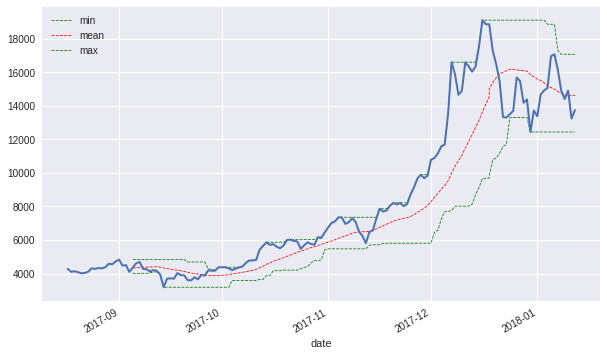

In [643]:
pd.options.plotting.backend='matplotlib' 
ax = df_BTC_close_daily[['min','mean','max']].iloc[:150].plot(figsize=(10,6),style=['g--','r--','g--'],lw=0.8)
df_BTC_close_daily['close'].iloc[:150].plot(ax=ax, lw=2.0)

Subplots of the closing price, trade count and average trade size are plotted. It was of interest to see what relationship the tradesize, so the average tradesize was calculated and ploted.

It seems that the number of trades increased with price as did the average trade size. Though earlier trade sizes where also larger (driven by an unknown factor).

It seems that increased number of trades could represent liquidity and this liquidity could also increase the value of the asset.

In [644]:
df_BTC_USD_daily['USD_avg_tradesize'] = df_BTC_USD_daily['Volume USDT'] / df_BTC_USD_daily['tradecount']

df_BTC_close_trades_daily = pd.DataFrame(df_BTC_USD_daily[['close','tradecount','USD_avg_tradesize']])
plyo.iplot(
    df_BTC_close_trades_daily.iplot(asFigure=True,
    subplots=True)
)

In the section that follows we utilise a simple method from Hilpisch (2020) that utilises a fast and slow Simple Moving Average (SMA) to indicate Buy Sell signals. In this case when the Fast SMA trendline moves over the Slow SMA trendline a long position in BTC is indicated. The general trend of BTC has been to move upwards within this time frame, though as a basic signal this indicator looks like it would have been positive if what simplistic.

<AxesSubplot:xlabel='date'>

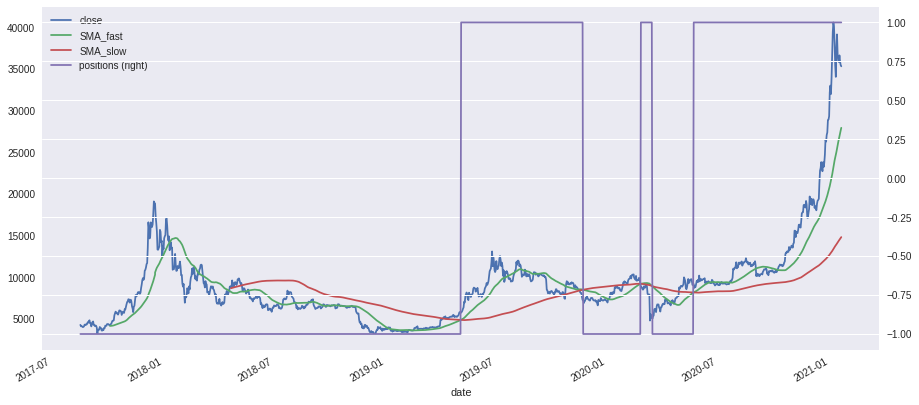

In [645]:
df_BTC_close_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_BTC_close_daily['SMA_fast'] = df_BTC_close_daily['close'].rolling(window=50).mean()
df_BTC_close_daily['SMA_slow'] = df_BTC_close_daily['close'].rolling(window=250).mean()
df_BTC_close_daily['positions'] = np.where(df_BTC_close_daily['SMA_fast'] > df_BTC_close_daily['SMA_slow'],1,-1)
df_BTC_close_daily[['close','SMA_fast','SMA_slow','positions']].plot(figsize=(15,7), secondary_y='positions', grid=False)


Now we load the gold prices from Yahoo Finance (2021) and explore.

In [646]:
df_GOLD_USD_daily = pd.read_csv('crypto_data/gold_usd_prices.csv', skiprows=0)

In [647]:
df_GOLD_USD_daily.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-01,1116.699951,1130.000000,1115.300049,1127.900024,1127.900024,1682.0
1,2016-02-02,1128.300049,1131.400024,1123.000000,1127.300049,1127.300049,1230.0
2,2016-02-03,1128.500000,1146.000000,1125.000000,1141.300049,1141.300049,1630.0
3,2016-02-04,1142.500000,1157.599976,1141.000000,1157.599976,1157.599976,771.0
4,2016-02-05,1155.599976,1174.800049,1146.000000,1157.800049,1157.800049,877.0
5,2016-02-07,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-02-08,1173.500000,1200.400024,1165.000000,1197.900024,1197.900024,931.0
7,2016-02-09,1188.699951,1199.199951,1186.699951,1198.699951,1198.699951,700.0
8,2016-02-10,1189.800049,1197.699951,1182.099976,1194.699951,1194.699951,671.0
9,2016-02-11,1205.599976,1260.800049,1204.599976,1247.900024,1247.900024,995.0


We can see already null values. 

In [648]:
from datetime import datetime
import calendar

In [649]:
date = datetime(2016,2,7)

In [650]:
calendar.day_name[date.weekday()] 

'Sunday'

We can see that the null date is a Sunday and the preceding day of the 6th of February 2016 is missing. Lets look further and see what dates are missing.

In [651]:
print(datetime.strptime('2016-02-07', "%Y-%m-%d"))

2016-02-07 00:00:00


In [652]:
calendar.day_name[datetime.strptime('2016-02-07', "%Y-%m-%d").weekday()]

'Sunday'

In [653]:
df_GOLD_USD_daily['day_name'] = df_GOLD_USD_daily_dates['day_name'] = df_GOLD_USD_daily['Date'].apply(lambda x: calendar.day_name[datetime.strptime(x, "%Y-%m-%d").weekday()])

In [654]:
df_GOLD_USD_daily[df_GOLD_USD_daily['Low'].isna()].groupby('day_name').count()

,Date,Open,High,Low,Close,Adj Close,Volume
day_name,,,,,,,
Friday,4,0,0,0,0,0,0
Monday,4,0,0,0,0,0,0
Sunday,261,0,0,0,0,0,0
Thursday,1,0,0,0,0,0,0
Tuesday,2,0,0,0,0,0,0
Wednesday,1,0,0,0,0,0,0


It seems likely that the missing dates, predominantly Sundays are holidays and the prices were not available to collect. Regardless of the reason to plot a chart, for example, would display breaks in continuity for these days. It seems reasonable to fill the missing data with that of the previous day to retain time series continuity.

In [658]:
df_GOLD_USD_daily = df_GOLD_USD_daily.fillna(method='ffill')

Now convert gold prices to a time series data frame.

In [659]:
df_GOLD_USD_daily['Date'] = pd.to_datetime(df_GOLD_USD_daily['Date'])

In [660]:
df_GOLD_USD_daily.index = df_GOLD_USD_daily['Date']

In [661]:
df_GOLD_USD_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_name
Date,,,,,,,,
2016-02-01,2016-02-01,1116.699951,1130.000000,1115.300049,1127.900024,1127.900024,1682.0,Monday
2016-02-02,2016-02-02,1128.300049,1131.400024,1123.000000,1127.300049,1127.300049,1230.0,Tuesday
2016-02-03,2016-02-03,1128.500000,1146.000000,1125.000000,1141.300049,1141.300049,1630.0,Wednesday
2016-02-04,2016-02-04,1142.500000,1157.599976,1141.000000,1157.599976,1157.599976,771.0,Thursday
2016-02-05,2016-02-05,1155.599976,1174.800049,1146.000000,1157.800049,1157.800049,877.0,Friday


It should now be possible to plot another simple SMA trading strategy chart for the gold data to see how it differs from that of BTC.

<AxesSubplot:xlabel='Date'>

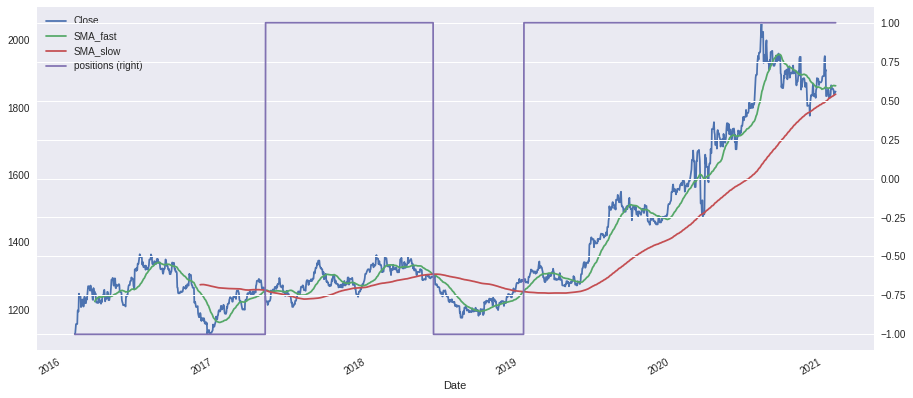

In [662]:
df_GOLD_USD_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_GOLD_USD_daily['SMA_fast'] = df_GOLD_USD_daily['Close'].rolling(window=42).mean()
df_GOLD_USD_daily['SMA_slow'] = df_GOLD_USD_daily['Close'].rolling(window=252).mean()
df_GOLD_USD_daily['positions'] = np.where(df_GOLD_USD_daily['SMA_fast'] > df_GOLD_USD_daily['SMA_slow'],1,-1)
df_GOLD_USD_daily[['Close','SMA_fast','SMA_slow','positions']].plot(figsize=(15,7), secondary_y='positions', grid=False)


So already we can see a similarity between BTC and GLD. Lets see what a correlation analysis reveals.

In [663]:
df_BTC_USD_daily.sort_index(axis=0 ,ascending=True, inplace=True)
# get data from 2018 onward only to match the time periods studied
df_BTC_USD_daily_2018_plus = df_BTC_USD_daily.loc['2018-01-03':'2021-01-21']
df_GOLD_USD_daily_2018_plus = df_GOLD_USD_daily.loc['2018-01-03':'2021-01-21']

In [664]:
# now only select the closing prices

In [665]:
df_BTC_USD_daily_2018_plus.rename(columns={'close' : 'BTC'},inplace=True)
df_GOLD_USD_daily_2018_plus.rename(columns={'Close' : 'GLD'}, inplace=True)

In [666]:
df_BTC_USD_daily_2018_plus.head(1)

,unix,symbol,open,high,low,BTC,Volume BTC,Volume USDT,tradecount,USD_avg_tradesize
date,,,,,,,,,,
2018-01-03,1.514938e+12,BTC/USDT,14690.0,15307.56,14150.0,14919.51,15905.667639,2.361169e+08,162787.0,1450.465137


In [667]:
df_GOLD_USD_daily_2018_plus.head(1)

,Date,Open,High,Low,GLD,Adj Close,Volume,day_name,SMA_fast,SMA_slow,positions
Date,,,,,,,,,,,
2018-01-03,2018-01-03,1320.0,1320.099976,1312.099976,1316.199951,1316.199951,42.0,Wednesday,1275.711908,1267.515478,1


In [668]:
df_BTC_GLD_plus_2018 = df_BTC_USD_daily_2018_plus.join(df_GOLD_USD_daily_2018_plus)

In [669]:
df_BTC_GLD_plus_2018 = df_BTC_GLD_plus_2018[['BTC','GLD']]

In [670]:
# fill forward days that are created by the join. BTC data is for every day within the timeframe
df_BTC_GLD_plus_2018 = df_BTC_GLD_plus_2018.fillna(method='ffill')

In df_BTC_GLD_plus_2018 we have merged the closing gold prices and filled in any null values to ensure continuity of each series.

We can now determine the log returns for each and determine the extent of the correlation.

In [730]:
df_BTC_GLD_plus_2018_rets = np.log(df_BTC_GLD_plus_2018 / df_BTC_GLD_plus_2018.shift(1))

In [672]:
df_BTC_GLD_plus_2018

,BTC,GLD
date,,
2018-01-03,14919.51,1316.199951
2018-01-04,15059.54,1319.400024
2018-01-05,16960.39,1320.300049
2018-01-06,17069.79,1320.300049
2018-01-07,16150.03,1320.300049
...,...,...
2021-01-17,35828.61,1829.300049
2021-01-18,36631.27,1829.300049
2021-01-19,35891.49,1839.500000


In [673]:
df_BTC_GLD_plus_2018_returns = np.log(df_BTC_GLD_plus_2018 / df_BTC_GLD_plus_2018.shift(1))

In [674]:
df_BTC_GLD_plus_2018_returns.dropna(inplace=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

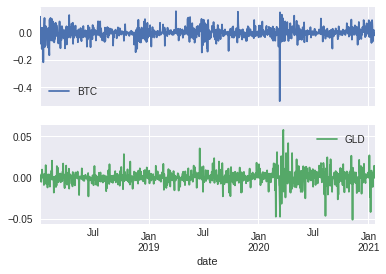

In [675]:
df_BTC_GLD_plus_2018_returns.plot(subplots=True)

In [676]:
df_BTC_GLD_plus_2018

,BTC,GLD
date,,
2018-01-03,14919.51,1316.199951
2018-01-04,15059.54,1319.400024
2018-01-05,16960.39,1320.300049
2018-01-06,17069.79,1320.300049
2018-01-07,16150.03,1320.300049
...,...,...
2021-01-17,35828.61,1829.300049
2021-01-18,36631.27,1829.300049
2021-01-19,35891.49,1839.500000


We can also follow the lead of Hilpisch (2020) and utiles ordinary least-squares (OLS) regression to determine the extent of correlation.

In [677]:
reg = np.polyfit(df_BTC_GLD_plus_2018_returns['BTC'],df_BTC_GLD_plus_2018_returns['GLD'],deg=1)

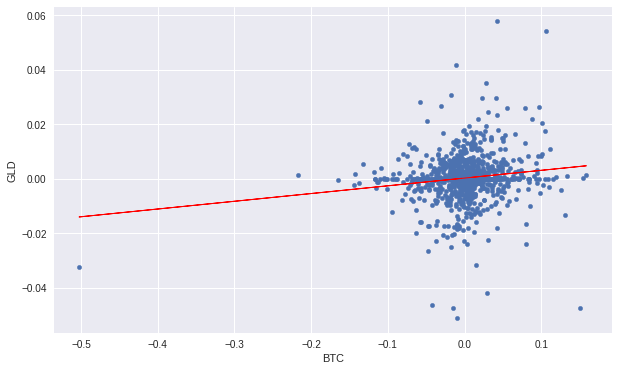

In [678]:
ax1 = df_BTC_GLD_plus_2018_returns.plot(kind='scatter', x='BTC', y='GLD', figsize=(10,6))
ax1.plot(df_BTC_GLD_plus_2018_returns['BTC'],np.polyval(reg, df_BTC_GLD_plus_2018_returns['BTC']),'r',lw=1)

The correlation matrix can be demonstrated, thus:

In [679]:
cmatrix = df_BTC_GLD_plus_2018_returns.corr()
cmatrix

,BTC,GLD
BTC,1.000000,0.143089
GLD,0.143089,1.000000


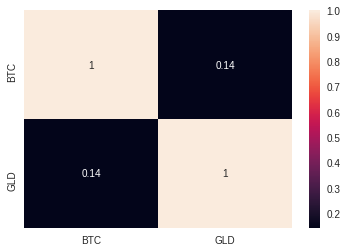

In [680]:
import seaborn as sn
sn.heatmap(cmatrix, annot=True)
plt.show()

We can see that the correlation seems negligible. 

Because the data is time series the correlation can be plotted overtime to determine if there are periods where this correlation is stronger (the following method is quoted from Hilpisch 2020).

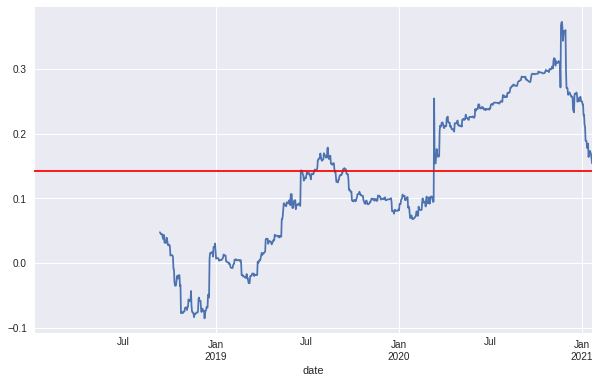

In [681]:
ax2 = df_BTC_GLD_plus_2018_returns['BTC'].rolling(window=252).corr(df_BTC_GLD_plus_2018_returns['GLD']).plot(figsize=(10,6))
ax2.axhline(df_BTC_GLD_plus_2018_returns.corr().iloc[0,1],c='r')

Correlation analysis over time series points to negative correlation prior Jan 2020, thereafter positive. This however could be attributed to some other hidden factors or other global econmic situations (speculation though possibly the coronavirus pandemic). The hypothesis at the outset were true, that GLD and BTC should show some correlation if they are both considered stores of value. This does not appear to be the case prior to Jan 2020 though correlation seems to have increased after Jan 2020 though a continual trend upwards has been shown in the data set from the origin time. Regardless, the correlation is still weak at under 0.3: it would be interesting to follow the trend over time. Does this increasing correlation really mean that BTC is becoming more like gold? The immediate plummet at the end of Jan could be demonstrating the impact related to Elon Musk's recent twitter profile change, thus the price of BTC jumping by means of sentiment in the market over its potentially growing role as a store of value. It will potentially start monetary competition with other stores-of-value and perhaps the growing correlation is showing this.

# Part 2. Trading Strategies and Machine Learning

In this section we return to the SMA example from earlier. We attempt to caclute the:

1. Return of the simple SMA strategy over just holding a long position in the BTC asset.
2. The possible enhancement of strategy that can be achieved using a simple machine learning model.

(We assume a trading period of 2018-01-03 to 2021-01-21)

<AxesSubplot:xlabel='date'>

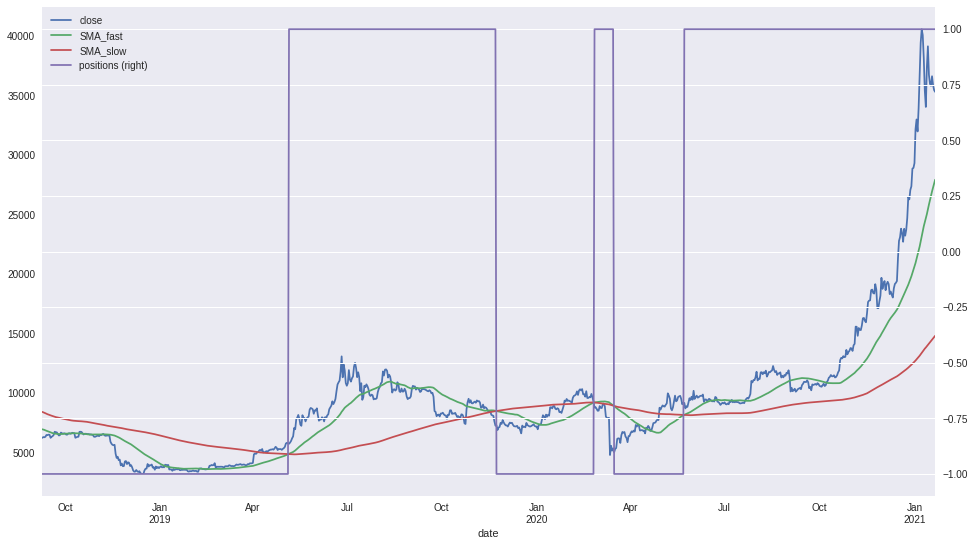

In [682]:
df_BTC_close_daily = df_BTC_close_daily.loc['2018-01-03':'2021-01-21']
df_BTC_close_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_BTC_close_daily['SMA_fast'] = df_BTC_close_daily['close'].rolling(window=50).mean()
df_BTC_close_daily['SMA_slow'] = df_BTC_close_daily['close'].rolling(window=250).mean()
df_BTC_close_daily['positions'] = np.where(df_BTC_close_daily['SMA_fast'] > df_BTC_close_daily['SMA_slow'],1,-1)
df_BTC_close_daily.dropna(inplace=True)
df_BTC_close_daily[['close','SMA_fast','SMA_slow','positions']].plot(figsize=(16,9), secondary_y='positions', grid=False)

Caclulate the log return of BTC called simple_returns. sma_returns calculates the return determined by taking the position indicated in positions utilising the SMA_slow and SMA_fast and simulating placing a trade at the close of day t0 and earning the returns of day t+1. The strategies are assuming no effect of trading costs, commissions or spreads.

In [683]:
df_BTC_close_daily['simple_returns'] = np.log(df_BTC_close_daily['close'] / df_BTC_close_daily['close'].shift(1))
df_BTC_close_daily['sma_returns'] = df_BTC_close_daily['positions'].shift(1) * df_BTC_close_daily['simple_returns']

In [684]:
df_BTC_close_daily.dropna(inplace=True)

Sum the log returns for both strategies and use the exponential to calculate how well each strategy did.

In [685]:
np.exp(df_BTC_close_daily[['simple_returns','sma_returns']].sum())

simple_returns    5.650317
sma_returns       1.389344
dtype: float64

In [686]:
np.exp()

ValueError: invalid number of arguments

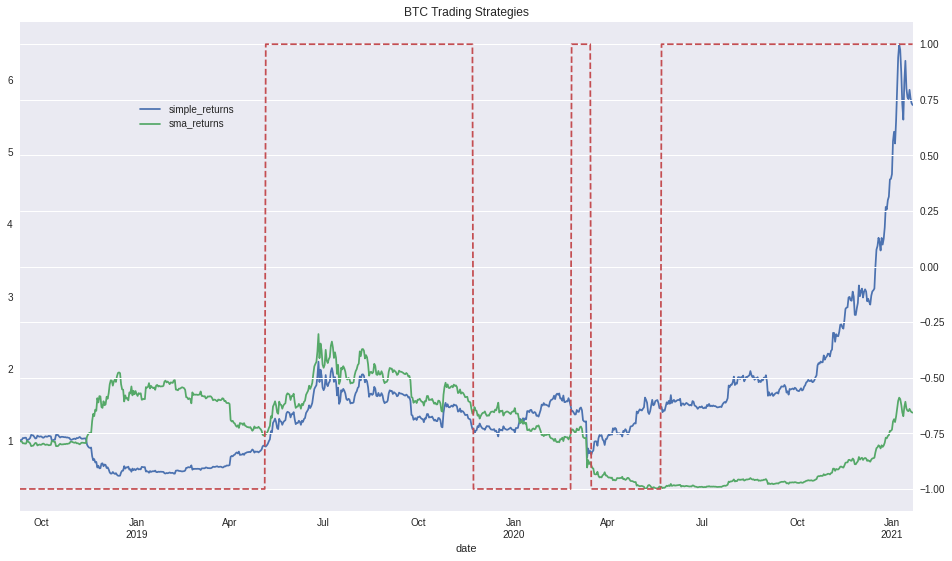

In [687]:
ax = df_BTC_close_daily[['simple_returns','sma_returns']].cumsum().apply(np.exp).plot(figsize=(16,9),title='BTC Trading Strategies')
df_BTC_close_daily['positions'].plot(ax=ax, secondary_y='positions', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [688]:
6338.62 * 5.610733

35564.30440846

In [689]:
df_BTC_close_daily.tail()

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,sma_returns
date,,,,,,,,,,,
2021-01-17,35828.61,27385.00,40582.81,34759.6285,35616.540,35944.799538,26584.1050,14396.50740,1,-0.004633,-0.004633
2021-01-18,36631.27,28875.54,40582.81,35221.9420,35911.795,36459.652385,26953.0306,14505.79500,1,0.022156,0.022156
2021-01-19,35891.49,28923.63,40582.81,35572.7395,35943.235,36033.530596,27276.9430,14610.19304,1,-0.020402,-0.020402
2021-01-20,35468.23,29331.69,40582.81,35899.9695,35943.235,35609.555149,27611.0084,14714.80028,1,-0.011863,-0.011863
2021-01-21,35319.06,31988.71,40582.81,36199.3380,35943.235,35391.683787,27933.3078,14818.55144,1,-0.004215,-0.004215


We can see that a simple SMA trading strategy would have been inferior to an even simpler holding strategy during the time period with the opportunity cost of 5.650317 - 1.389344 times the return.

In this section we prepare the model fit and evaluation code as per Hilpisch (2020).

In [690]:
from sklearn import linear_model
from sklearn.svm import SVC

In [691]:
models = {
    'log_reg' : linear_model.LogisticRegression(C=1),
    'svm' : SVC(C=1)
}

In [692]:
def fit_models(data):
    mfit = {model: models[model].fit(data[cols_bin], data['direction']) for model in models.keys()}

In [693]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [694]:
def evaluate_strategies(data):
    global sel
    sel = []
    for model in models.keys():
        col  ='strat_' + model
        data[col] = data['pos_' + model] * data['simple_returns']
        sel.append(col)
    sel.insert(0, 'returns')

Data preparation to use the above strategies requires that the returns in the data are classified as the log returns as per the previous calculations for the SMA trading strategy. The direction of the return also needs to be classified as to wether it is positive or negative. To do this we begin to adjust the existing data from the SMA strategy above.

In [695]:
df_BTC_close_daily.head()

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,sma_returns
date,,,,,,,,,,,
2018-09-10,6312.00,6185.05,7359.06,6774.8355,6716.82,6296.686734,6943.5136,8391.21504,-1,0.009742,-0.009742
2018-09-11,6294.91,6185.05,7359.06,6771.5365,6716.82,6295.354183,6914.9916,8356.15652,-1,-0.002711,0.002711
2018-09-12,6338.62,6185.05,7359.06,6762.2170,6716.82,6327.803546,6873.8192,8313.66944,-1,0.006920,-0.006920
2018-09-13,6487.38,6185.05,7359.06,6752.5040,6716.82,6447.485886,6840.0540,8271.33980,-1,0.023198,-0.023198
2018-09-14,6476.63,6185.05,7359.06,6739.6535,6700.00,6469.343972,6811.1866,8232.64620,-1,-0.001658,0.001658


In [696]:
df_BTC_close_daily['direction'] = np.sign(df_BTC_close_daily['simple_returns']).astype(int)

In [697]:
df_BTC_close_daily.head()

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,sma_returns,direction
date,,,,,,,,,,,,
2018-09-10,6312.00,6185.05,7359.06,6774.8355,6716.82,6296.686734,6943.5136,8391.21504,-1,0.009742,-0.009742,1
2018-09-11,6294.91,6185.05,7359.06,6771.5365,6716.82,6295.354183,6914.9916,8356.15652,-1,-0.002711,0.002711,-1
2018-09-12,6338.62,6185.05,7359.06,6762.2170,6716.82,6327.803546,6873.8192,8313.66944,-1,0.006920,-0.006920,1
2018-09-13,6487.38,6185.05,7359.06,6752.5040,6716.82,6447.485886,6840.0540,8271.33980,-1,0.023198,-0.023198,1
2018-09-14,6476.63,6185.05,7359.06,6739.6535,6700.00,6469.343972,6811.1866,8232.64620,-1,-0.001658,0.001658,-1


Now the directions are classified according to the sign of the return.

Now we engineer the features by using a lag of the returns. If we choose six lags as features this is equivalent to a trader using six consecutive historical data points to predict the next movement direction of the currency.

In [698]:
def create_lags(data, lags):
    global cols
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['simple_returns'].shift(lag)
        cols.append(col)

In [699]:
create_lags(df_BTC_close_daily,6)

In [700]:
df_BTC_close_daily.head(3)

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,sma_returns,direction,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
date,,,,,,,,,,,,,,,,,,
2018-09-10,6312.00,6185.05,7359.06,6774.8355,6716.82,6296.686734,6943.5136,8391.21504,-1,0.009742,-0.009742,1,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-11,6294.91,6185.05,7359.06,6771.5365,6716.82,6295.354183,6914.9916,8356.15652,-1,-0.002711,0.002711,-1,0.009742,NaN,NaN,NaN,NaN,NaN
2018-09-12,6338.62,6185.05,7359.06,6762.2170,6716.82,6327.803546,6873.8192,8313.66944,-1,0.006920,-0.006920,1,-0.002711,0.009742,NaN,NaN,NaN,NaN


In [701]:
df_BTC_close_daily.dropna(inplace=True)

In [702]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [703]:
create_bins(df_BTC_close_daily)

In [704]:
df_BTC_close_daily.head(3)

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,...,lag_3,lag_4,lag_5,lag_6,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,lag_6_bin
date,,,,,,,,,,,,,,,,,,,,,
2018-09-16,6505.00,6185.05,7359.06,6710.2195,6515.485,6504.638998,6743.3136,8167.51588,-1,-0.001530,...,0.023198,0.006920,-0.002711,0.009742,1,0,1,1,0,1
2018-09-17,6248.69,6185.05,7359.06,6668.8485,6509.980,6312.677250,6704.0674,8132.88228,-1,-0.040199,...,-0.001658,0.023198,0.006920,-0.002711,0,1,0,1,1,0
2018-09-18,6336.45,6185.05,7359.06,6634.1100,6496.190,6330.506812,6667.3180,8105.27296,-1,0.013947,...,0.005901,-0.001658,0.023198,0.006920,0,0,1,0,1,1


In [705]:
fit_models(df_BTC_close_daily)

In [706]:
derive_positions(df_BTC_close_daily)

In [707]:
evaluate_strategies(df_BTC_close_daily)

In [711]:
df_BTC_close_daily.head(15)

,close,min,max,mean,median,ewma,SMA_fast,SMA_slow,positions,simple_returns,...,lag_1_bin,lag_2_bin,lag_3_bin,lag_4_bin,lag_5_bin,lag_6_bin,pos_log_reg,pos_svm,strat_log_reg,strat_svm
date,,,,,,,,,,,,,,,,,,,,,
2018-09-16,6505.00,6185.05,7359.06,6710.2195,6515.485,6504.638998,6743.3136,8167.51588,-1,-0.001530,...,1,0,1,1,0,1,-1,-1,0.001530,0.001530
2018-09-17,6248.69,6185.05,7359.06,6668.8485,6509.980,6312.677250,6704.0674,8132.88228,-1,-0.040199,...,0,1,0,1,1,0,1,1,-0.040199,-0.040199
2018-09-18,6336.45,6185.05,7359.06,6634.1100,6496.190,6330.506812,6667.3180,8105.27296,-1,0.013947,...,0,0,1,0,1,1,1,-1,0.013947,-0.013947
2018-09-19,6391.89,6185.05,7359.06,6604.4625,6482.005,6376.544203,6640.5372,8075.88048,-1,0.008711,...,1,0,0,1,0,1,-1,-1,-0.008711,-0.008711
2018-09-20,6492.00,6185.05,7359.06,6578.5020,6482.005,6463.136051,6618.2856,8045.00848,-1,0.015541,...,1,1,0,0,1,0,1,1,0.015541,0.015541
2018-09-21,6759.02,6185.05,7359.06,6556.4525,6482.005,6685.049013,6602.9518,8018.14460,-1,0.040307,...,1,1,1,0,0,1,-1,1,-0.040307,0.040307
2018-09-22,6723.05,6185.05,7359.06,6527.5045,6482.005,6713.549753,6589.0372,7990.87708,-1,-0.005336,...,1,1,1,1,0,0,1,1,-0.005336,-0.005336
2018-09-23,6708.00,6185.05,7359.06,6499.7535,6482.005,6709.387438,6583.0004,7974.10908,-1,-0.002241,...,0,1,1,1,1,0,1,1,-0.002241,-0.002241
2018-09-24,6581.39,6185.05,6759.02,6460.8700,6482.005,6613.389360,6574.1444,7956.47948,-1,-0.019055,...,0,0,1,1,1,1,1,1,-0.019055,-0.019055


In [712]:
df_BTC_close_daily[['simple_returns','sma_returns','strat_log_reg','strat_svm']].sum().apply(np.exp)

simple_returns     5.421224
sma_returns        1.448056
strat_log_reg     19.647759
strat_svm         59.440490
dtype: float64

<AxesSubplot:xlabel='date'>

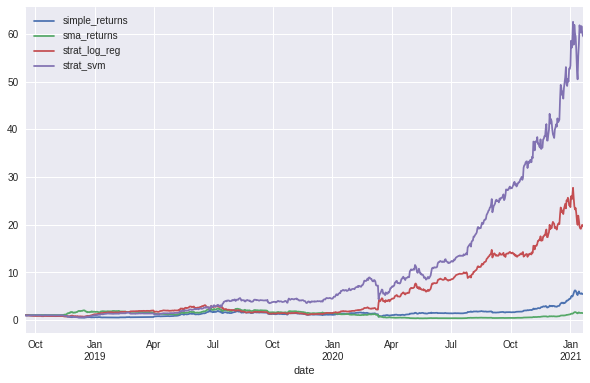

In [713]:
df_BTC_close_daily[['simple_returns','sma_returns','strat_log_reg','strat_svm']].cumsum().apply(np.exp).plot(figsize=(10,6))

The svm model is clearly outperforming other methods, quite substantially. Though this method is somewhat artificial as the entire data set it utilised. To test more realistic scenarios a test and train split of the data can be used. This will simulate training the data on historical returns and then using that to predict possible future returns on unseen data. The machine learning algorithms are essentially overfitting.

Splitting the data for this case is extremely simple compared and does not require the test_train_split function as it is merely time linear data.

In [714]:
split_point = int(len(df_BTC_close_daily) * 0.3)

In [718]:
data_to_train = df_BTC_close_daily.iloc[:split_point].copy()

In [722]:
fit_models(data_to_train)

In [723]:
data_to_test = df_BTC_close_daily.iloc[split_point:].copy()

In [724]:
derive_positions(data_to_test)

In [725]:
evaluate_strategies(data_to_test)

<AxesSubplot:xlabel='date'>

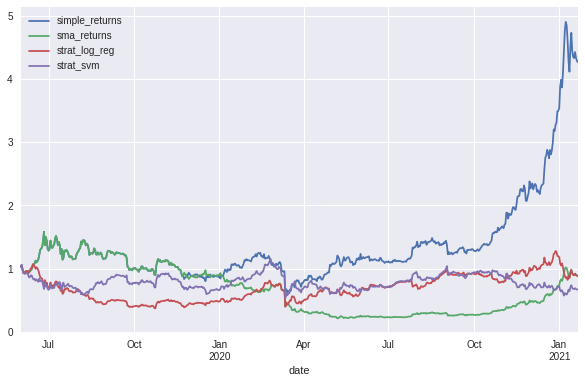

In [726]:
data_to_test[['simple_returns','sma_returns','strat_log_reg','strat_svm']].cumsum().apply(np.exp).plot(figsize=(10,6))

In this case (more akin to the real world) than the above cases, no algorithmic machine learning strategy works better than a simple hold strategy.

# Conclusion

Part 1 of this study, investigating how BTC could potentially relate to GLD as a store of value demonstrates that there is a possibility that there is an increasing correlation over time between BTC price and GLD price movements. To further improve this study, time is required to further assess the relationship in our existing simplified model; though, the addition and study of additional financial metrics that impact the GLD price, though applied to BTC could be considered - e.g. inflation metrics.

During part one we also had to remedy null values in the GLD data and choose to use the fill forward methodology so as to ensure continuity in the data.

Part 2 of this study deeply assessed the methods Hilpisch (2020) demonstrates in order to start identifying a potential machine learning based strategy for increasing hypothetical future returns of trading BTC, through only technical analysis and not fundamental analysis. The simple hold strategy was pitted against a second reference strategy of Fast and Slow Simple Moving Averages (SMA). Further to this Support Vector Machine and Logistic Regression strategies were added with simplified engineered features of return lags and whether a position should be short or long. The machine learning strategies all appeared to be weak once tested with a train / test split of the data and compared to a simple hold strategy.

Though our findings that simply holding BTC generates effective returns and in reality with costs accrued per trade is certainly more efficient is perhaps itself a very fitting answer as to how best to trade BTC in the current environment, essentially buy and hold.

It is likely that the unusual nature of BTCs recent ascent could be confounding the training and testing of our algorithms: i.e. that the real driver for BTC prices is something more fundamental than technical analysis; such as the store-of-value effect studied in part 1.

Future improvement could include attempting the same strategies on hourly data instead of daily, perhaps here there are technical analysis relationships that are more subtle and intra day trading could benefit from a machine learning approach.



# References

Ammous, S (2018). The Bitcoin Standard: The Decentralized Alternative to Central Banking. Wiley.

Binance (2021). Crypto Currency Data: Bitcoin USD. From https://www.cryptodatadownload.com.

Hilpisch, Y (2020). Python for Finance: Mastering Data Driven Finance. O'Reilly.

Yahoo (2021). Gold Prices Daily. From https://uk.finance.yahoo.com.